# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [ ]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 

Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

In [ ]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean

LenaImage = io.imread('./images/lena-grey.bmp')
#io.imshow(LenaImage)
avg = mean(LenaImage,disk(3))
plt.imshow(avg,cmap = cm.Greys_r)
plt.title('Mean With Radius 3')
io.show()

avg2 = mean(LenaImage,disk(5))
plt.imshow(avg2,cmap = cm.Greys_r)
plt.title('Mean With Radius 5')
io.show()

avg3 = mean(LenaImage,disk(7))
plt.imshow(avg3,cmap = cm.Greys_r)
plt.title('Mean With Radius 7')
io.show()


### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

In [ ]:
#using the mean mask
mean_mask = np.ones((14,14),dtype = float)
mean_mask /= np.sum(np.sum(mean_mask))

#using filters.convolve
from scipy import ndimage
Lena_Conv = ndimage.filters.convolve(LenaImage,mean_mask)
plt.imshow(Lena_Conv,cmap = cm.Greys_r)
plt.title('Filtering Using Convolution')
io.show()

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [ ]:
from skimage import filters

### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Q.3** Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

In [ ]:
from skimage import data
Leaves_Im = io.imread('./images/leaves.jpg',as_grey = True)
from skimage import filters
edges = filters.roberts(Leaves_Im)
plt.imshow(edges,cmap = cm.Greys_r)
plt.title('Roberts')
io.show()

from skimage import data
Leaves_Im = io.imread('./images/leaves.jpg',as_grey = True)
from skimage import filters
edges = filters.prewitt(Leaves_Im)
plt.imshow(edges,cmap = cm.Greys_r)
plt.title('Prewitt')
io.show()

from skimage import data
Leaves_Im = io.imread('./images/leaves.jpg',as_grey = True)
from skimage import filters
edges = filters.sobel(Leaves_Im)
plt.imshow(edges,cmap = cm.Greys_r)
plt.title('Sobel')
io.show()

from skimage import data
Leaves_Im = io.imread('./images/leaves.jpg',as_grey = True)
from skimage import filters
edges = filters.scharr(Leaves_Im)
plt.imshow(edges,cmap = cm.Greys_r)
plt.title('Scharr')
io.show()

**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 

In [ ]:
sobelX = np.array((
[1, 0, -1],
[2, 0, -2],
[1, 0, -1]), dtype="int")
#sobelX /= np.sum(np.sum(sobelX))
Leaves_Im = io.imread('./images/leaves.jpg',as_grey = True)

#using filters.convolve
from scipy import ndimage
Leaves_Conv1 = ndimage.filters.convolve(Leaves_Im,sobelX)
plt.imshow(Leaves_Im,cmap = cm.Greys_r)
plt.title('Filtering Using Convolution_SobelX')
io.show()

sobelY = np.array((
[1, 2, 1],
[0, 0, 0],
[-1, -2, -1]), dtype="int")
#sobelX /= np.sum(np.sum(sobelX))
Leaves_Im = io.imread('./images/leaves.jpg',as_grey = True)
#using filters.convolve

from scipy import ndimage
Leaves_Conv2 = ndimage.filters.convolve(Leaves_Im,sobelY)
plt.imshow(Leaves_Im,cmap = cm.Greys_r)
plt.title('Filtering Using Convolution_SobelY')
io.show()

from skimage import data
Leaves_Im = io.imread('./images/leaves.jpg',as_grey = True)
from skimage import filters
edges = filters.sobel_h(Leaves_Im)
plt.imshow(edges,cmap = cm.Greys_r)
plt.title('SobelX')
io.show()

from skimage import data
Leaves_Im = io.imread('./images/leaves.jpg',as_grey = True)
from skimage import filters
edges = filters.sobel_v(Leaves_Im)
plt.imshow(edges,cmap = cm.Greys_r)
plt.title('SobelY')
io.show()




### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

In [ ]:
from skimage import data
Leaves_Im = io.imread('./images/leaves.jpg',as_grey = True)
from skimage import filters
edges = filters.laplace(Leaves_Im)
plt.imshow(edges,cmap = cm.Greys_r)
plt.title('Laplace Filter')
io.show()

### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

In [ ]:
from skimage.filters import gabor
from skimage import data, io
from matplotlib import pyplot as plt

LenaImage = io.imread('./images/lena-grey.bmp')
# detecting edges in a coin image
filt_real, filt_imag = gabor(LenaImage, frequency=0.05,theta=60)          
plt.imshow( filt_real,cmap = cm.Greys_r) 
plt.title('Gabor Filtering With Frequency (0.05)' )
io.show()

filt_real, filt_imag = gabor(LenaImage, frequency=0.1,theta=60)          
plt.imshow(filt_real,cmap = cm.Greys_r) 
plt.title('Gabor Filtering With Frequency (0.1) ')
io.show()

filt_real, filt_imag= gabor(LenaImage, frequency=0.15,theta=60)            
plt.imshow(filt_real,cmap = cm.Greys_r) 
plt.title('Gabor Filtering With Frequency (0.15)')
io.show()

filt_real, filt_imag= gabor(LenaImage, frequency=0.2,theta=60)            
plt.imshow(filt_real,cmap = cm.Greys_r) 
plt.title('Gabor Filtering With Frequency (0.2) ')
io.show()

filt_real, filt_imag = gabor(LenaImage, frequency=0.3,theta=60)           
plt.imshow(filt_real,cmap = cm.Greys_r) 
plt.title('Gabor Filtering With Frequency (0.1) ')
io.show()

filt_real, filt_imag = gabor(LenaImage, frequency=0.4,theta=60)           
plt.imshow(filt_real,cmap = cm.Greys_r) 
plt.title('Gabor Filtering With Frequency (0.4) ')
io.show()

filt_real, filt_imag = gabor(LenaImage, frequency=0.5,theta=60)           
plt.imshow( filt_real,cmap = cm.Greys_r) 
plt.title('Gabor Filtering With Frequency (0.5) ')
io.show()

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [ ]:
from skimage import util

In [ ]:
from skimage import util
LenaImage = io.imread('./images/lena-grey.bmp')
LenaGaussNoise= random_noise(LenaImage, mode='gaussian', seed=None, clip=True)
plt.imshow(LenaGaussNoise,cmap = cm.Greys_r)
plt.title('Gaussian Noise')
io.show()

LenaGSNPNoise= random_noise(LenaImage, mode='s&p', seed=None, clip=True)
plt.imshow(LenaGSNPNoise,cmap = cm.Greys_r)
plt.title('Salt and Pepper')
io.show()

LenaSpeckleNoise= random_noise(LenaImage, mode='speckle', seed=None, clip=True)
plt.imshow(LenaSpeckleNoise,cmap = cm.Greys_r)
plt.title('Speckle')
io.show()

**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

C:\Users\Ama Katseena Yawson\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


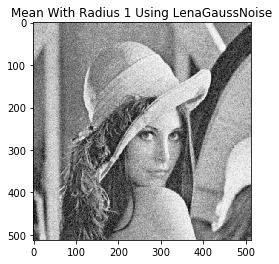

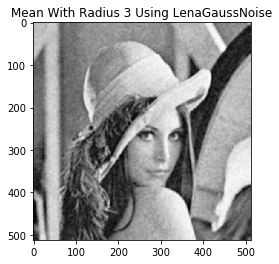

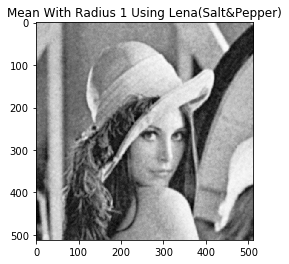

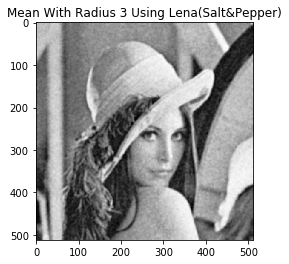

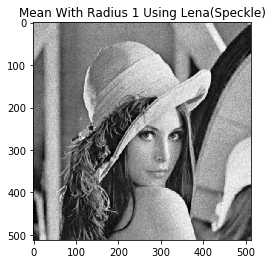

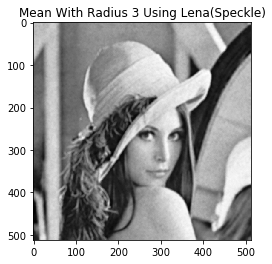

In [13]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean
from skimage import util
from skimage import img_as_float

LenaGaussNoise_MeanFilter = mean(LenaGaussNoise,disk(1))
plt.imshow(LenaGaussNoise_MeanFilter,cmap = cm.Greys_r)
plt.title('Mean With Radius 1 Using LenaGaussNoise')
io.show()

LenaGaussNoise_MeanFilter = mean(LenaGaussNoise,disk(3))
plt.imshow(LenaGaussNoise_MeanFilter,cmap = cm.Greys_r)
plt.title('Mean With Radius 3 Using LenaGaussNoise')
io.show()

LenaGSNPNoise_MeanFilter = mean(LenaGSNPNoise,disk(1))
plt.imshow(LenaGaussNoise_MeanFilter,cmap = cm.Greys_r)
plt.title('Mean With Radius 1 Using Lena(Salt&Pepper)')
io.show()

LenaGSNPNoise_MeanFilter = mean(LenaGSNPNoise,disk(3))
plt.imshow(LenaGaussNoise_MeanFilter,cmap = cm.Greys_r)
plt.title('Mean With Radius 3 Using Lena(Salt&Pepper)')
io.show()

LenaSpeckleNoise_MeanFilter = mean(LenaSpeckleNoise,disk(1))
plt.imshow(LenaSpeckleNoise_MeanFilter,cmap = cm.Greys_r)
plt.title('Mean With Radius 1 Using Lena(Speckle)')
io.show()

LenaSpeckleNoise_MeanFilter = mean(LenaSpeckleNoise,disk(3))
plt.imshow(LenaSpeckleNoise_MeanFilter,cmap = cm.Greys_r)
plt.title('Mean With Radius 3 Using Lena(Speckle)')
io.show()

** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

C:\Users\Ama Katseena Yawson\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


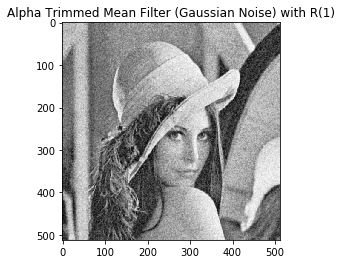

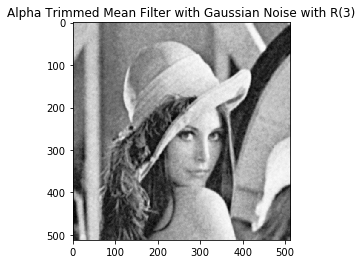

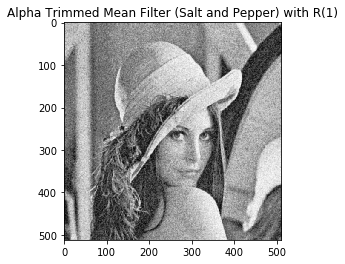

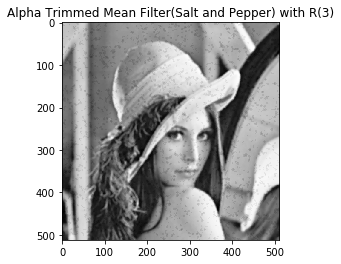

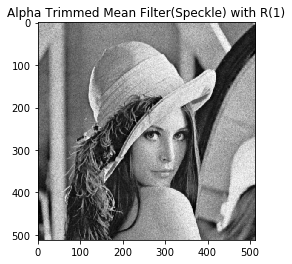

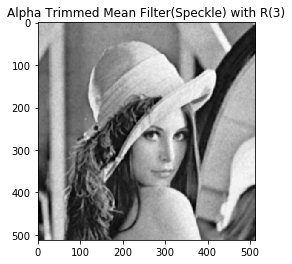

In [14]:
from skimage import data
from skimage.morphology import disk
from skimage.filters import rank

image = LenaGaussNoise
selem = disk(1)
percentile_result1 = rank.mean_percentile(image, selem=selem, p0=.05, p1=.95)
plt.imshow(percentile_result1,cmap = cm.Greys_r)
plt.title('Alpha Trimmed Mean Filter (Gaussian Noise) with R(1)')
io.show()

image =LenaGaussNoise
selem = disk(3)
percentile_result2 = rank.mean_percentile(image, selem=selem, p0=.05, p1=.95)
plt.imshow(percentile_result2,cmap = cm.Greys_r)
plt.title('Alpha Trimmed Mean Filter with Gaussian Noise with R(3)')
io.show()

image = LenaGSNPNoise
selem = disk(1)
percentile_result3 = rank.mean_percentile(image, selem=selem, p0=.05, p1=.95)
plt.imshow(percentile_result1,cmap = cm.Greys_r)
plt.title('Alpha Trimmed Mean Filter (Salt and Pepper) with R(1)')
io.show()

image = LenaGSNPNoise
selem = disk(3)
percentile_result4 = rank.mean_percentile(image, selem=selem, p0=.05, p1=.95)
plt.imshow(percentile_result4,cmap = cm.Greys_r)
plt.title('Alpha Trimmed Mean Filter(Salt and Pepper) with R(3)')
io.show()

image = LenaSpeckleNoise
selem = disk(1)
percentile_result5 = rank.mean_percentile(image, selem=selem, p0=.05, p1=.95)
plt.imshow(percentile_result5,cmap = cm.Greys_r)
plt.title('Alpha Trimmed Mean Filter(Speckle) with R(1)')
io.show()

image = LenaSpeckleNoise
selem = disk(3)
percentile_result6 = rank.mean_percentile(image, selem=selem, p0=.05, p1=.95)
plt.imshow(percentile_result6,cmap = cm.Greys_r)
plt.title('Alpha Trimmed Mean Filter(Speckle) with R(3)')
io.show()

** Q.7.3 median filter: **

C:\Users\Ama Katseena Yawson\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


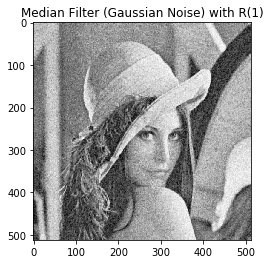

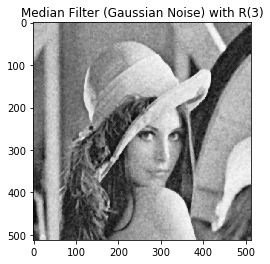

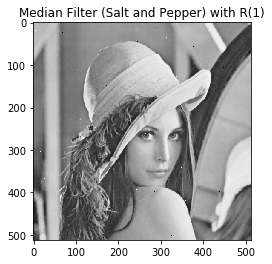

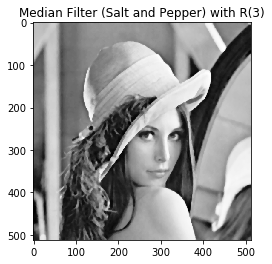

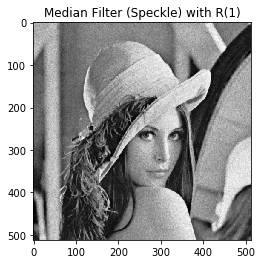

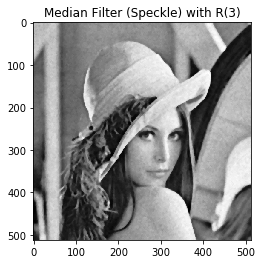

In [15]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median

img1 = LenaGaussNoise
med1 = median(img1, disk(1))
plt.imshow(med1,cmap = cm.Greys_r)
plt.title('Median Filter (Gaussian Noise) with R(1)')
io.show()

img2 = LenaGaussNoise
med2 = median(img2, disk(3))
plt.imshow(med2,cmap = cm.Greys_r)
plt.title('Median Filter (Gaussian Noise) with R(3)')
io.show()

img3 = LenaGSNPNoise
med3 = median(img3, disk(1))
plt.imshow(med3,cmap = cm.Greys_r)
plt.title('Median Filter (Salt and Pepper) with R(1)')
io.show()

img4 = LenaGSNPNoise
med4 = median(img4, disk(3))
plt.imshow(med4,cmap = cm.Greys_r)
plt.title('Median Filter (Salt and Pepper) with R(3)')
io.show()


img5 = LenaSpeckleNoise
med5 = median(img5, disk(1))
plt.imshow(med5,cmap = cm.Greys_r)
plt.title('Median Filter (Speckle) with R(1)')
io.show()

img6 = LenaSpeckleNoise
med6 = median(img6, disk(3))
plt.imshow(med6,cmap = cm.Greys_r)
plt.title('Median Filter (Speckle) with R(3)')
io.show()

## 4.4 Sharpening

**Q.8** Use the `railway` image and sharpen the image using laplacian fitering.

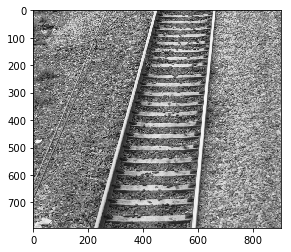

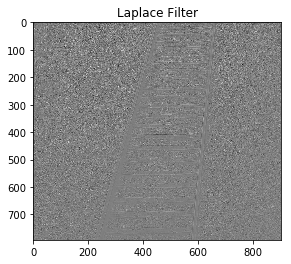

In [16]:
from skimage import data
Railway_Im = io.imread('./images/railway.jpg',as_grey = True)
plt.imshow(Railway_Im,cmap = cm.Greys_r)
io.show()

from skimage import filters
edges = filters.laplace(Railway_Im)
plt.imshow(edges,cmap = cm.Greys_r)
plt.title('Laplace Filter')
io.show()

## 4.5 Hough transform

** Q.9 ** Define your Hough_trans function which finds the lines within an image

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` or `cv2.canny` edge detector to find the primary edges**

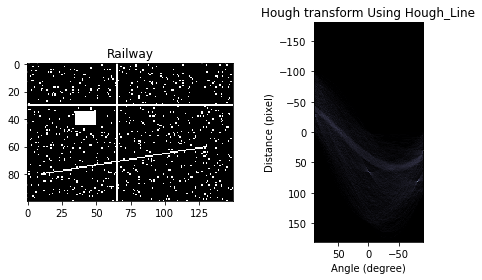

In [83]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import hough_line
from skimage.draw import line
Railway_Im = np.zeros((100, 150), dtype=bool)
Railway_Im[30, :] = 1
Railway_Im[:, 65] = 1
Railway_Im[35:45, 35:50] = 1
rr, cc = line(60, 130, 80, 10)
Railway_Im[rr, cc] = 1
Railway_Im += np.random.random(Railway_Im.shape) > 0.95


out, angles, d = hough_line(Railway_Im)

fix, axes = plt.subplots(1, 2, figsize=(7, 4))

axes[0].imshow(Railway_Im, cmap=plt.cm.gray)
axes[0].set_title('Railway')

axes[1].imshow(
    out, cmap=plt.cm.bone,
    extent=(np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]))
axes[1].set_title('Hough transform Using Hough_Line')
axes[1].set_xlabel('Angle (degree)')
axes[1].set_ylabel('Distance (pixel)')

plt.tight_layout()
io.show()

#Railway_Im

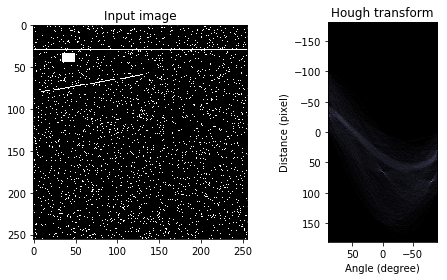

In [82]:
import matplotlib.pyplot as plt

from skimage.transform import hough_line
from skimage.draw import line

Building_Im = io.imread('./images/building.jpg')
Building_Im = np.zeros((256,256), dtype=bool)
Building_Im[30, :] = 1
Building_Im[:, 65] = 1
Building_Im[35:45, 35:50] = 1
rr, cc = line(60, 130, 80, 10)
Building_Im[rr, cc] = 1
Building_Im += np.random.random(Building_Im.shape) > 0.95


p = hough_line(Building_Im)

fix, axes = plt.subplots(1, 2, figsize=(7, 4))

axes[0].imshow(Building_Im,cmap = cm.Greys_r)
axes[0].set_title('Input image')

axes[1].imshow(
    out, cmap=plt.cm.bone,
    extent=(np.rad2deg(angles[-1]), np.rad2deg(angles[0]), d[-1], d[0]))
axes[1].set_title('Hough transform')
axes[1].set_xlabel('Angle (degree)')
axes[1].set_ylabel('Distance (pixel)')

plt.tight_layout()
io.show()

#Railway_Im

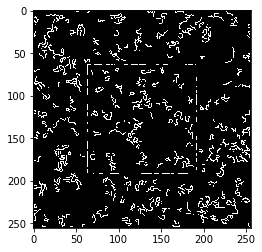

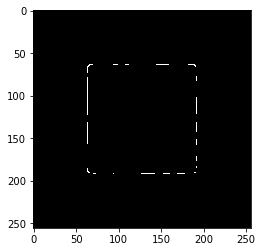

In [81]:
import matplotlib.pyplot as plt
from skimage import feature
 # Generate noisy image of a square
Building_Im = np.zeros((256,256))
Building_Im[64:-64, 64:-64] = 1
Building_Im += 0.2 * np.random.rand(*Building_Im.shape)
# First trial with the Canny filter, with the default smoothing
edges1 = feature.canny(Building_Im)
plt.imshow(edges1,cmap = cm.Greys_r)
io.show()

# Increase the smoothing for better results
edges2 = feature.canny(Building_Im, sigma=3)
plt.imshow(edges2,cmap = cm.Greys_r)
io.show()

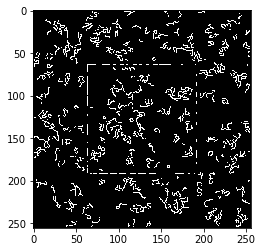

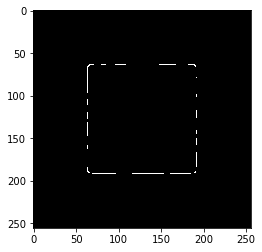

In [80]:
import matplotlib.pyplot as plt
from skimage import feature
 # Generate noisy image of a square
Railway_Im = np.zeros((256,256))
Railway_Im [64:-64, 64:-64] = 1
Railway_Im  += 0.2 * np.random.rand(*Railway_Im.shape)
# First trial with the Canny filter, with the default smoothing
edges1 = feature.canny(Railway_Im)
plt.imshow(edges1,cmap = cm.Greys_r)
io.show()

# Increase the smoothing for better results
edges2 = feature.canny(Railway_Im, sigma=3)
plt.imshow(edges2,cmap = cm.Greys_r)
io.show()